<a href="https://colab.research.google.com/github/ELiTE0005/DeepLearningTechniques/blob/main/EXP5_Study_of_activation_functions_and_its_role.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training model with activation: relu


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test accuracy with relu: 0.9662

Training model with activation: sigmoid
Test accuracy with sigmoid: 0.9431

Training model with activation: tanh
Test accuracy with tanh: 0.9630

Training model with activation: leaky_relu


/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Test accuracy with leaky_relu: 0.9671


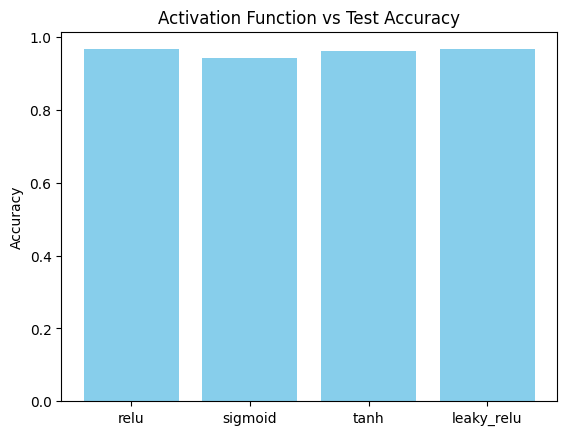

In [1]:


import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

def create_model(activation):
    model = models.Sequential([
        layers.Dense(128, activation=activation, input_shape=(784,)),
        layers.Dense(64, activation=activation),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

activations = ['relu', 'sigmoid', 'tanh', 'leaky_relu']
results = {}

for act in activations:
    print(f"\nTraining model with activation: {act}")
    if act == 'leaky_relu':
        model = models.Sequential([
            layers.Dense(128),
            layers.LeakyReLU(alpha=0.1),
            layers.Dense(64),
            layers.LeakyReLU(alpha=0.1),
            layers.Dense(10, activation='softmax')
        ])
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    else:
        model = create_model(act)

    history = model.fit(x_train, y_train, epochs=3, batch_size=128, validation_split=0.1, verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    results[act] = test_acc
    print(f"Test accuracy with {act}: {test_acc:.4f}")

plt.bar(results.keys(), results.values(), color='skyblue')
plt.title("Activation Function vs Test Accuracy")
plt.ylabel("Accuracy")
plt.show()
